In [1]:
using YahooFinance

In [2]:
q = get_symbols("QQQ", "2019-01-01", "2021-09-24")

688×6 TimeSeries.TimeArray{Any, 2, Dates.Date, Matrix{Any}} 2019-01-02 to 2021-09-23
│            │ Open   │ High   │ Low    │ Close  │ Volume   │ Adjusted │
├────────────┼────────┼────────┼────────┼────────┼──────────┼──────────┤
│ 2019-01-02 │ 150.99 │ 155.75 │ 150.88 │ 154.88 │ 58576700 │ 152.2063 │
│ 2019-01-03 │ 152.6  │ 153.26 │ 149.49 │ 149.82 │ 74820200 │ 147.2336 │
│ 2019-01-04 │ 152.34 │ 157.0  │ 151.74 │ 156.23 │ 74709300 │ 153.533  │
│ 2019-01-07 │ 156.62 │ 158.86 │ 156.11 │ 158.09 │ 52059300 │ 155.3609 │
│ 2019-01-08 │ 159.54 │ 160.11 │ 157.2  │ 159.52 │ 49388700 │ 156.7662 │
│ 2019-01-09 │ 160.14 │ 161.52 │ 159.47 │ 160.82 │ 46491700 │ 158.0437 │
│ 2019-01-10 │ 159.6  │ 161.37 │ 158.7  │ 161.28 │ 38943400 │ 158.4958 │
│ 2019-01-11 │ 160.33 │ 160.86 │ 159.79 │ 160.69 │ 30176600 │ 157.916  │
│ 2019-01-14 │ 159.33 │ 159.96 │ 158.59 │ 159.27 │ 30710200 │ 156.5205 │
│ 2019-01-15 │ 160.0  │ 162.6  │ 159.91 │ 162.38 │ 40874200 │ 159.5768 │
│ 2019-01-16 │ 162.65 │ 163.78 │ 162.29

In [3]:
q500 = q["Adjusted"][189:end]

500×1 TimeSeries.TimeArray{Any, 1, Dates.Date, Vector{Any}} 2019-10-01 to 2021-09-23
│            │ Adjusted │
├────────────┼──────────┤
│ 2019-10-01 │ 185.1524 │
│ 2019-10-02 │ 181.9687 │
│ 2019-10-03 │ 183.9659 │
│ 2019-10-04 │ 186.6749 │
│ 2019-10-07 │ 186.1114 │
│ 2019-10-08 │ 183.3233 │
│ 2019-10-09 │ 185.1128 │
│ 2019-10-10 │ 186.5464 │
│ 2019-10-11 │ 188.9489 │
│ 2019-10-14 │ 188.9291 │
│ 2019-10-15 │ 191.3317 │
│ 2019-10-16 │ 190.8571 │
   ⋮
│ 2021-09-09 │ 379.0497 │
│ 2021-09-10 │ 376.1729 │
│ 2021-09-13 │ 375.9132 │
│ 2021-09-14 │ 374.8444 │
│ 2021-09-15 │ 377.6313 │
│ 2021-09-16 │ 377.891  │
│ 2021-09-17 │ 373.416  │
│ 2021-09-20 │ 365.7    │
│ 2021-09-21 │ 366.15   │
│ 2021-09-22 │ 369.57   │
│ 2021-09-23 │ 372.98   │

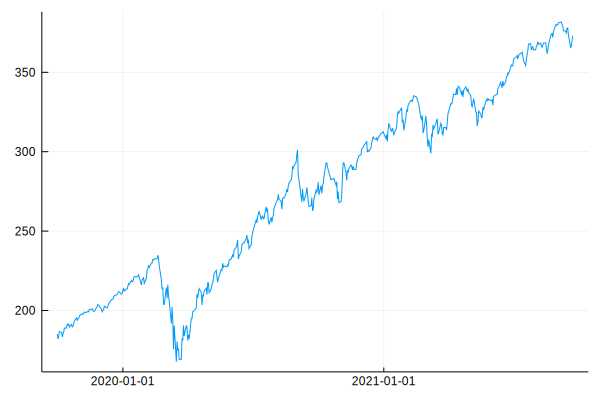

In [4]:
using Plots

plot(q500, legend = false)

In [6]:
using ARCHModels
#ret = diff(log(Array{Float64}(q[:Adjusted])))
ret = diff(log.(values(q500.Adjusted)))
#Matrix(q)
#fit = garchFit(ret)
fit(GARCH{1, 1}, ret)


GARCH{1, 1} model with Gaussian errors, T=499.

Mean equation parameters:
────────────────────────────────────────────
    Estimate    Std.Error  z value  Pr(>|z|)
────────────────────────────────────────────
μ  0.0012787  0.000560642  2.28078    0.0226
────────────────────────────────────────────

Volatility parameters:
──────────────────────────────────────────────
     Estimate   Std.Error    z value  Pr(>|z|)
──────────────────────────────────────────────
ω   7.1179e-6  8.73184e-6   0.815167    0.4150
β₁  0.769586   0.0407651   18.8785      <1e-78
α₁  0.217459   0.0694932    3.12921     0.0018
──────────────────────────────────────────────


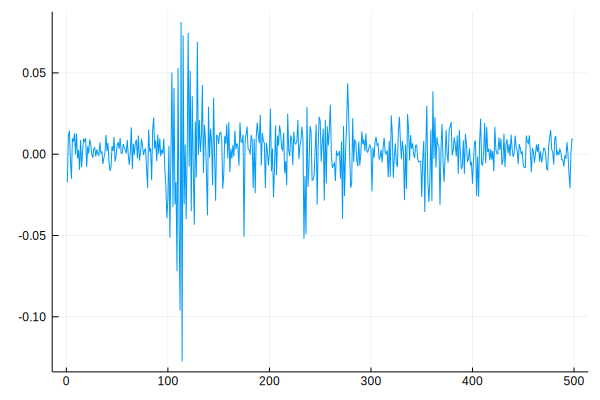

In [10]:
plot(ret, legend = false)